# NLP

In [2]:
# titulos

titles=open('data/title_list.txt').read().split('\n')[0:100]
titles[:15]

['The Godfather',
 'The Shawshank Redemption',
 "Schindler's List",
 'Raging Bull',
 'Casablanca',
 "One Flew Over the Cuckoo's Nest",
 'Gone with the Wind',
 'Citizen Kane',
 'The Wizard of Oz',
 'Titanic',
 'Lawrence of Arabia',
 'The Godfather: Part II',
 'Psycho',
 'Sunset Blvd.',
 'Vertigo']

In [4]:
# sinopsis

synopses=open('data/synopses_list.txt').read().split('\n BREAKS HERE')[0:100]
synopses[0]

' Plot  [edit]  [  [  edit  edit  ]  ]  \n  On the day of his only daughter\'s wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito\'s youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. Vito\'s godson Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasive studio head, Jack Woltz. Woltz is unmoved until the morning he wakes up in bed with the severed head of his prized stallion.  On the day of his only daughter\'s wedding,   Vito Corleone  Vito Corleone   hears requests in his role as the Godfather, the   Don  Don   of a New York crime family. Vito\'s youngest son,   Michael  Michael  , in a   Marine Corps  Marine Corps   uniform, introduces his girlfriend,   Kay Adams  Kay Adams  , to his family at the sprawling reception. Vito\'s godson 

In [5]:
# limpieza

import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [6]:
# !python3 -m spacy download en

nlp=spacy.load('en')

In [7]:
parser=English()

In [18]:
import re

def spacy_tokenizer(sentence):
    tokens=parser(sentence)
    
    filtered_tokens=[]
    for word in tokens:
        lemma=word.lemma_.lower().strip()
        #print (word, lemma)
        if lemma not in STOP_WORDS and re.search('^[a-zA-Z]+$', lemma):
            filtered_tokens.append(lemma)
    
    return filtered_tokens

In [19]:
spacy_tokenizer(synopses[0])[:15]

['plot',
 'edit',
 'edit',
 'edit',
 'day',
 'daughter',
 'wedding',
 'vito',
 'corleone',
 'hears',
 'requests',
 'role',
 'godfather',
 'don',
 'new']

In [21]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
tfidf=TfidfVectorizer(min_df=0.15, tokenizer=spacy_tokenizer)
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=0.15, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function spacy_tokenizer at 0x121a7b200>,
                use_idf=True, vocabulary=None)

In [28]:
tfidf_matrix=tfidf.fit_transform(synopses)
tfidf_matrix.shape

(100, 254)

In [29]:
terms=tfidf.get_feature_names()
len(terms)

254

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

dist=1-cosine_similarity(tfidf_matrix)
dist.shape

(100, 100)

In [31]:
# Clustering

import warnings
warnings.simplefilter('ignore')

from umap import UMAP

In [32]:
umap=UMAP(n_neighbors=5, random_state=42)
emb=umap.fit_transform(dist)
emb[:5]

array([[-1.4891616 ,  4.0788736 ],
       [-1.7629136 ,  0.16342701],
       [-4.7745385 ,  2.5759263 ],
       [-0.6867237 ,  0.73427945],
       [-0.8975087 ,  2.8176866 ]], dtype=float32)

In [35]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

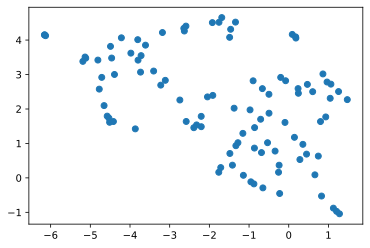

In [36]:
plt.scatter(emb[:,0], emb[:,1]);

In [37]:
import numpy as np
from hdbscan import HDBSCAN

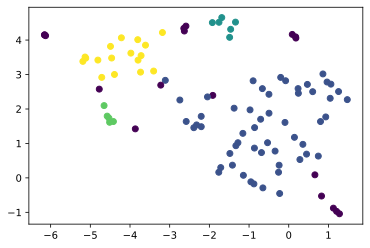

In [38]:
hdbscan=HDBSCAN(min_cluster_size=5)
clusters=hdbscan.fit_predict(emb)
np.unique(clusters)
plt.scatter(emb[:,0], emb[:,1], c=clusters)

In [39]:
import pandas as pd

In [40]:
def get_titles_from_cluster(c):
    return pd.Series(titles)[clusters==c]

In [60]:
titles_cluster=get_titles_from_cluster(1)
titles_cluster

0              The Godfather
11    The Godfather: Part II
58               The Pianist
59                Goodfellas
77                     Giant
78       The Grapes of Wrath
dtype: object

In [45]:
tfidf_df=pd.DataFrame(tfidf_matrix.toarray(), columns=terms)
tfidf_df.head()

,able,agrees,air,american,apartment,army,arrive,arrives,asks,attack,...,window,woman,work,working,world,wounded,year,years,york,young
0,0.0,0.064639,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.053967,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.07811,0.062870,0.159100,0.0
1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.074787,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.091133,0.073637,0.0,0.00000,0.133108,0.000000,0.0
2,0.0,0.073228,0.000000,0.000000,0.0,0.121965,0.000000,0.146456,0.061139,0.0,...,0.0,0.0,0.000000,0.000000,0.197012,0.0,0.00000,0.000000,0.000000,0.0
3,0.0,0.000000,0.069901,0.089895,0.0,0.085550,0.000000,0.000000,0.128654,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.06207,0.000000,0.189641,0.0
4,0.0,0.069514,0.000000,0.081106,0.0,0.077186,0.075976,0.000000,0.000000,0.0,...,0.0,0.0,0.079747,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0


In [47]:
tfidf_df.columns

Index(['able', 'agrees', 'air', 'american', 'apartment', 'army', 'arrive',
       'arrives', 'asks', 'attack',
       ...
       'window', 'woman', 'work', 'working', 'world', 'wounded', 'year',
       'years', 'york', 'young'],
      dtype='object', length=254)

In [48]:
def get_df_from_cluster(c):
    return tfidf_df[clusters==c]

In [49]:
get_df_from_cluster(0).head()

,able,agrees,air,american,apartment,army,arrive,arrives,asks,attack,...,window,woman,work,working,world,wounded,year,years,york,young
1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.074787,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.091133,0.073637,0.0,0.00000,0.133108,0.000000,0.000000
3,0.0,0.000000,0.069901,0.089895,0.0,0.085550,0.000000,0.000000,0.128654,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.06207,0.000000,0.189641,0.000000
4,0.0,0.069514,0.000000,0.081106,0.0,0.077186,0.075976,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.079747,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
5,0.0,0.000000,0.000000,0.104813,0.0,0.000000,0.000000,0.059888,0.000000,0.072370,...,0.489003,0.064449,0.000000,0.000000,0.064449,0.0,0.00000,0.000000,0.000000,0.056699
7,0.0,0.000000,0.000000,0.132768,0.0,0.000000,0.000000,0.000000,0.000000,0.091672,...,0.000000,0.000000,0.000000,0.000000,0.163278,0.0,0.00000,0.221358,0.280086,0.000000


In [52]:
get_df_from_cluster.oscar

AttributeError: 'function' object has no attribute 'oscar'

In [50]:
get_df_from_cluster(0).T.head()

,1,3,4,5,7,8,9,13,14,15,...,86,90,91,92,93,94,95,97,98,99
able,0.0,0.000000,0.000000,0.000000,0.000000,0.082404,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.109647,0.0
agrees,0.0,0.000000,0.069514,0.000000,0.000000,0.061872,0.000000,0.0,0.072263,0.082064,...,0.045357,0.123198,0.0,0.000000,0.0,0.0,0.0,0.126294,0.082327,0.0
air,0.0,0.069901,0.000000,0.000000,0.000000,0.168400,0.140015,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
american,0.0,0.089895,0.081106,0.104813,0.132768,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.073677,0.000000,0.0
apartment,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.057993,0.000000,0.0,0.088863,0.0,0.0,0.0,0.161479,0.000000,0.0


In [62]:
top_words_cluster=get_df_from_cluster(0).T.sum(axis=1).sort_values(ascending=False)
top_words_cluster.head(10)

tells     3.910588
father    3.827122
film      3.766433
new       3.622771
police    3.612162
man       3.522276
home      3.358292
house     3.322975
car       3.113808
later     2.957807
dtype: float64